# Papers

In [147]:
using Calculus
using Plots
plotlyjs()
theme(:juno)

# Mean field theory of demand responsive ride pooling systems
S. Herminghaus, 2019

---
## header
#### sub-header
> code\
some more code

i took the data from here: https:www.elizabeth.com/wum/wuming_today.txt

In [2]:
using Plots

LoadError: ArgumentError: Package Plots not found in current path:
- Run `import Pkg; Pkg.add("Plots")` to install the Plots package.


### Message
- dies
- das

### Variables/Parameters
dictated:
- $E$= customers / area
- $\nu$= requests/(customer*time)
- $D_i$ =distance of i-th requested trip
- $u$= intrinsic vehicle speed
- $t_f$= average driving time between stops
- $t_s$= average stop time
- $k\approx 3.1$= empirical (NYC) scaling exponent of travel distances
- $\kappa$= curvature of environment

tunable:
- $B$= buses / area
- $\delta_\text{max}$ maximum accepted detour factor
- $\tau$= time a customer waits until pick-up

redefined:
- $D=\langle D_i\rangle$ average length of requested trip
- $\alpha=\sqrt{(\delta_\text{max}^{2}-1)/4}$= angle of acceptance
- $C:=E\cdot\nu\cdot D^2$= requests / time
- $z:=D_i/D$
- $\beta:=B/E$= buses / customers
- $V=v/(\nu D)$= dimensionless velocity

derived quantities
- $H=1+\text{sgn}(\kappa)\cdot\left(\text{sinc}(D\sqrt{|\kappa|}-1\right)$= curvature correction factor
- $v=u\cdot\dfrac{t_f}{t_f+t_s}$= effective vehicle speed
- $q=\dfrac{\alpha}{\pi}\cdot\dfrac{k+1}{k}\cdot H$= probability that customer's destination is accepted by vehicle picking them up
- $\lambda=\dfrac{2\alpha D v \tau B}{2\langle b\rangle -1}$= (total "accepted" area by fleet after time $\tau$) x (bus density) = expected number of buses that can pick up customer 
- $\tau_w:=\langle\tau\rangle\propto\langle\lambda\rangle=1+\dfrac{1}{q\cdot(1+q)}$= average "accepted area" required for successful pick up

### Plots

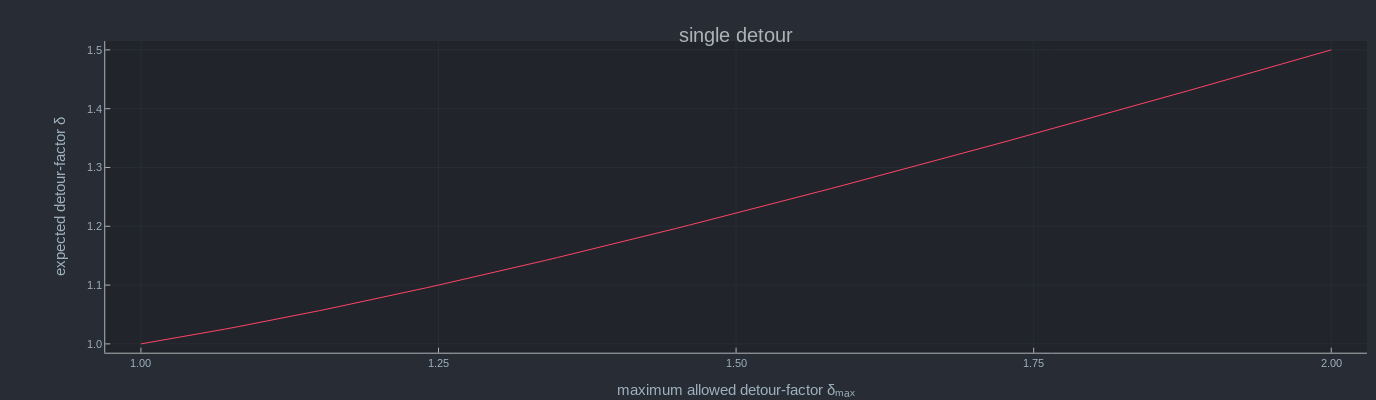

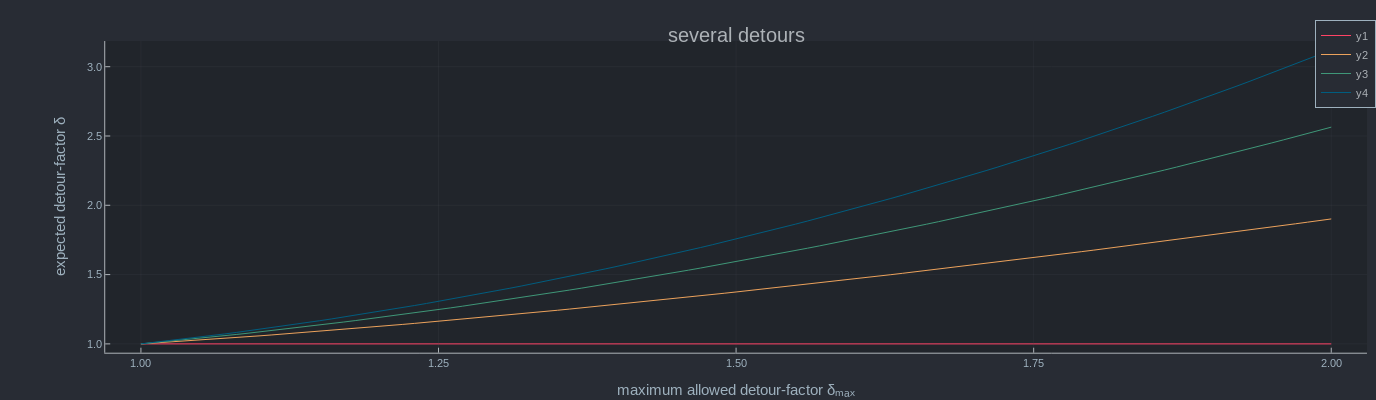

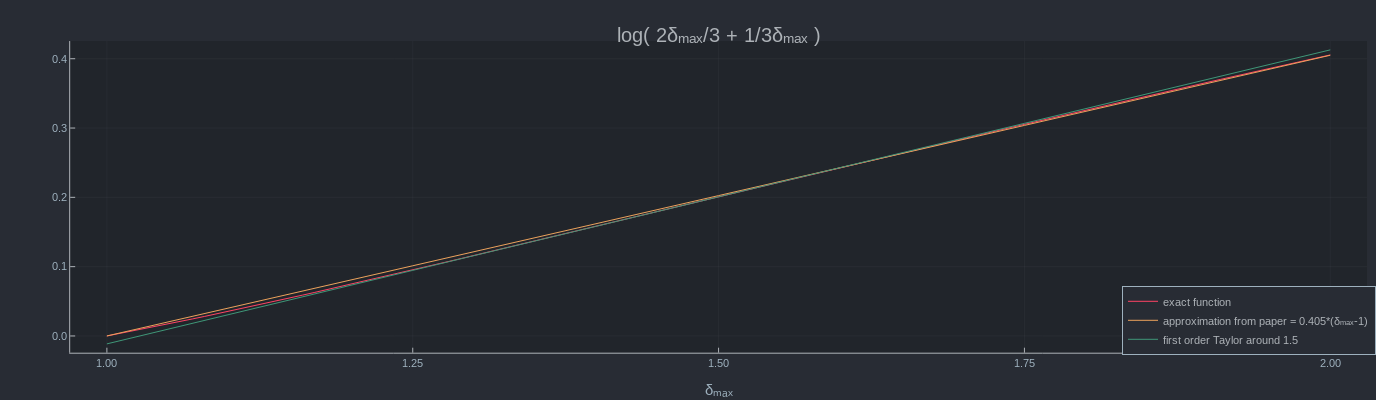

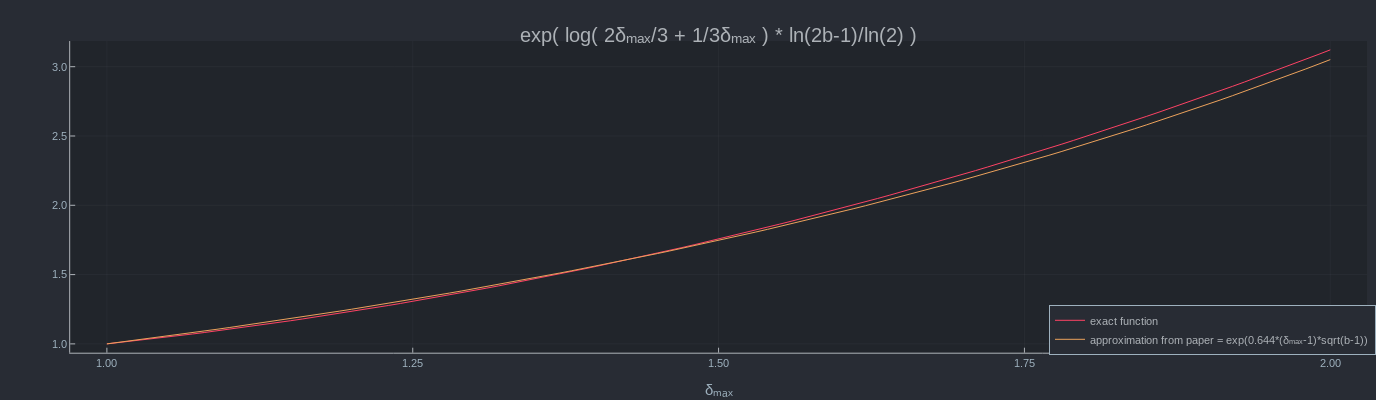

In [149]:
# single detour
δₘₐₓ=collect(1:0.01:2)
δone=(2/3)*δ+(1/3)*δ.^-1
p1=plot(δₘₐₓ,δone,xlab="maximum allowed detour-factor δₘₐₓ",ylab="expected detour-factor δ",title="single detour",lab=:none)
display(p1)

# multiple detours
b=1
δₘₐₓ=collect(1:0.01:2)
δmean=exp.(log.(δone)*log(2*b-1)/log(2))
p2=plot(δₘₐₓ,δmean,xlab="maximum allowed detour-factor δₘₐₓ",ylab="expected detour-factor δ",title="several detours")
for b in 2:4
    plot!(δₘₐₓ,exp.(log.(δone)*log(2*b-1)/log(2)))
end
display(p2)

#first approximation
p3=plot(δₘₐₓ,log.(δone),xlab="δₘₐₓ",lab="exact function",title="log( 2δₘₐₓ/3 + 1/3δₘₐₓ )",legend=:bottomright)
plot!(δₘₐₓ,0.405*(δₘₐₓ.-1),lab="approximation from paper = 0.405*(δₘₐₓ-1)")
plot!(δₘₐₓ,derivative(logδbar,1.5)*(δₘₐₓ.-1.5).+logδbar(1.5),lab="first order Taylor around 1.5")
display(p3)

#second approximation
b=4
p4=plot(δₘₐₓ,exp.(log.(δone)*log(2*b-1)/log(2)),xlab="δₘₐₓ",lab="exact function",title="exp( log( 2δₘₐₓ/3 + 1/3δₘₐₓ ) * ln(2b-1)/ln(2) )",legend=:bottomright)
plot!(δₘₐₓ,exp.(0.644*(δₘₐₓ.-1)*sqrt(b-1)),lab="approximation from paper = exp(0.644*(δₘₐₓ-1)*sqrt(b-1))")
display(p4)